# Objetivos

### 1. Aprender como representar un documento a un vector.


### 2. Conocer algunas aplicaciones de textmining tales como:

    2.1 Categorización de noticias.
    
    2.2 Recuperación de información.
    
    2.3 Descubrimiento de tópicos.

# Índice

Introduccion
Vector Space Model
    Preprocesamiento
    Clasficación
Information Retrieval





# Introducción

#### ¿Por qué los datos no estructurados son tan importantes?

Las empresas están tomando decisiones solo con el 20% de la información a la que tienen acceso, ya que el 80% de su información es no estructurada y no se puede utilizar completamente. Las compañías han tratado de darle sentido a los datos no estructurados por años, pero solo un 78\% afirma que tienen poca o nula información de sus datos no estructurados.

http://fredrikstenbeck.com/unstructured-data-important/

Fuentes de datos no estructurados en las empresas:
1. Medios de comunicación social. Ej: mención de una compañía o un producto en redes sociales.
2. Fuentes internas. Ej: Presentaciones, material de marketing y ventas, informes, correo electrónico, etc.
3. Contenido generado por el cliente. Ej: Comentarios en línea, historial de navegación, correos electrónicos a un equipo de soporte e incluso llamadas telefónicas al servicio al cliente.

#### ¿Cómo trabajamos con datos no estructurados?

**Embedding**: Llevar datos a una representación númerica. Los modelos trabajan con representaciones númericas!.
Además, con vectores tenemos nociones de distancia y podemos calcular similitud (o disimilitud) entre vectores.

En *text mining* existen dos tipos de *Embedding*, basados en frecuencia y en predicción.

Algunas *keywords*:

1. **Documento (D)**: se refiere a una observación de tipo texto. Ej: comentario, relato, email, etc.
2. **Corpus (C)**: colección de documentos, corresponde al conjunto de datos.
3. **Vocabulario (V)**: corresponde a un conjunto de términos (tokens únicos normalizados) dentro del corpus que sobrevivieron a un procesamiento.
4. **Tokenization**: dividir el texto en entidades significativa llamadas tokens, si cada token es una palabra se habla de unigrams, si cada token son pares de palabras se habla de bigrams, tres palabras son trigrams, así hasta n-grams. En términos más computines es pasar de un string a una lista de strings. 
Ejemplo de unigrams:

*'Buenos días estudiantes buenos' = ['Buenos', 'diás', 'estudiantes', 'buenos']*

In [655]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import operator
import itertools
import re
from numpy.linalg import norm
from time import time

#Preprocesamiento
import spacy
from spacy.lang.es.stop_words import STOP_WORDS #importar set de stopwords
from nltk.stem import SnowballStemmer #importar stemmer
nlp = spacy.load('es_core_news_sm') #python -m spacy download es

#Bag-of-words
from sklearn.feature_extraction.text import CountVectorizer  
from sklearn.feature_extraction.text import TfidfVectorizer

#Clasificación
import pickle
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, f1_score, classification_report

#Word embeddings
from sklearn.decomposition import PCA
from gensim.models.fasttext import FastText
from gensim.models.keyedvectors import KeyedVectors #clase para importar los embedding
import pyemd #implementación rápida de EMD, dependencia de wmd de gensim


#Topic modeling

from gensim.corpora import Dictionary, MmCorpus
from gensim.models.ldamodel import LdaModel
import pyLDAvis
import pyLDAvis.gensim

# Vector Space Model


Vector Space Model es un modelo que representa un documento como un vector de términos, donde cada término es una dimensión del vector.

- Documentos con diferentes palabras y largos viven en el mismo espacio.
- Estas representaciones son además llamadas **Bag of Words** (o bolsa de palabras), donde un documento es representado por un conjunto no ordenado de sus términos.

- El valor en cada dimensión is un peso que presenta la relevancia del término $i$ del vocabulario $V$ en el documento $d$.
\begin{equation*}
d^{\rightarrow} = (w_{1}, \ldots, w_{|V|} )
\end{equation*}

- Bag-of-words no representa la semántica de los documentos, palabras que son sinónimos por ejemplo son consideradas como términos diferentes, además el orden de las palabras dentro del documento se pierde.


**Term Frequency (TF)**: También llamada Count Vector, el peso asociado a cada término del vocabulario dentro de un documento viene dado por la frecuencia del término dentro del documento ($tf_{i}$). Ejemplo:

Tablita


**Term Frequency-Inverted Document Frequency (TF-IDF)**: Esta transformación consiste en normalizar la frecuencia de cada término  $tf_{i}$ de un documento por $idf_{i} = ln(\frac{N}{n_{i}})$, donde $n_{i}$ es las veces que el término ha aparecido al menos una vez en el total de documentos y $N$ es el número de documentos.  
    
\begin{equation*}
w_{i}= tf_{i}  idf_{i}
\end{equation*}
Notar que si existe un término $j$ que aparece en todos los documentos su peso es 0 pues $idf_{j}=ln(\frac{N}{n_{j}})=ln(\frac{N}{N}) = ln(1)=0$.


## 1. Preprocesamiento


El objetivo del preprocesamiento en text-mining es reducir el vocabulario, eliminando aquellas palabras irrelevantes y homologando palabras con un significado similar.
 
 Algunas técnicas que podemos aplicar para reducir el vocabulario:
 1. **Stop-words**: palabras que aportan poca información, por ejemplo: artículos, preposiciones, conectores. 
 2. **Stemming**: Llevar las palabra a su raíz gramatical. 
 3. **Lemmatization**: Llevar las palabras a su lema. 
 4. **Filtrar palabras de baja frecuencia**, por ejemplo menor a 10.
 5. **Filtrar palabras con alta frecuencia** (stopwords contextuales), por ejemplo aquellas palabras que aparecen en todos los documento. En este caso una transformación TF-IDF genera una columna de ceros, esto implica nula o poca heterogeneidad por ende eliminar.
 6. **Part of Speech Tagging (POST)**: etiquetado gramatical. Se suele utilizar en selección de atributos, por ejemplo dejando solo los sustantivos, pues estos son los que tienen la mayor parte de la información en una oración.
 7. Usar **técnicas de selección de atributos**, por ejemplo, mutual information, chi-square, etc.
 
 
 Buenas prácticas de procesamiento:

1. Eliminar caracteres no alfa-numéricos: $@\_\#\%\$/(?$
2. Corrección de Ortografía. Las palabras con mala ortografía suelen tener baja frecuencia.
3. Eliminar números, urls, correos (depende del contexto).
4. Identificar palabras claves de ser necesario, por ejemplo, "Juegos Olímpicos" debiese ser considerado como un token.

### Base de datos
La base de datos consiste de 5 conjuntos de noticias extraídas de la radio biobio. 
Cada conjunto de noticias contiene 200 documentos (noticias) y tiene asociado una categoría en {nacional, internacional, economía, sociedad, opinion}.

In [396]:
nacional = pd.read_json("https://raw.githubusercontent.com/dccuchile/CC6205/master/tutorials/datasets/biobio_nacional.json", encoding ='utf-8')
internacional = pd.read_json("https://raw.githubusercontent.com/dccuchile/CC6205/master/tutorials/datasets/biobio_internacional.json", encoding ='utf-8')
economia = pd.read_json("https://raw.githubusercontent.com/dccuchile/CC6205/master/tutorials/datasets/biobio_economia.json", encoding ='utf-8')
sociedad = pd.read_json("https://raw.githubusercontent.com/dccuchile/CC6205/master/tutorials/datasets/biobio_sociedad.json", encoding ='utf-8')
opinion = pd.read_json("https://raw.githubusercontent.com/dccuchile/CC6205/master/tutorials/datasets/biobio_opinion.json", encoding ='utf-8')

df = [nacional, internacional, economia, sociedad, opinion]
df = pd.concat(df)
df.head()
df.reset_index(inplace=True, drop=True)

In [558]:
def tokenizer(doc, sep=None, stopwords_remove =False, lemmatization=False, stemming = False, vocabulary=None):
    '''
    Por defecto divide la sentencia por el carácter espacio.
    Ej: 'Data Mining is the best course'->['Data',  'Mining', 'is', 'the', 'best', 'course']
    
    Input: 
    1. doc: str, documento.
    2. sep: str, carácter para dividir el documento en tokens, por defecto es el espacio.
    3. stopwords_remove: bool, si es True remueve los stopwords del documento.
    4. lemmatization: bool, si es True lleva las palabras a su lema.
    5. stemming: bool, si es True lleva las palabas a su raíz.
    6. vocabuary: list, si un vocabulario es dado filtra las palabras que no estan presentes en el.
    
    Output: 
    list, lista de tokens.
    
    Nota: aplicar stemming y lemmatization al mismo tiempo no es correcto.
    '''
    doc = re.sub(r'[^\w\s]','', doc) #elimina los símbolos de puntuación
    doc = re.sub(r'[a-zA-Z]+[0-9]+', '', doc) #elimina los caracteres que contienen letras y números
    doc = re.sub(r'[0-9]+', ' ', doc) #elimina los caracteres numéricos
   
    tokens = doc.split(sep) #tokenización
    tokens = [word.lower() for word in tokens] #pasar todas las palabras a minúsculas
    
    
    
    if stopwords_remove ==True: #remover stopwords y palabras con menos de tres caracteres
        tokens = [word for word in tokens if word not in STOP_WORDS and len(word)>2]
    
    if lemmatization==True:
        tokens = [nlp(word)[0].lemma_ for word in tokens]
        
    if stemming == True:
        stemmer = SnowballStemmer('spanish')
        tokens = [stemmer.stem(word) for word in tokens]
    
    if vocabulary is not None:
        tokens = [word for word in tokens if word in vocabulary]
    
    return tokens


Historieta de donde se extrajó el texto:

https://cloud.google.com/products/ai/ml-comic-1/?fbclid=IwAR1ZgDUl1Gr1TVGZvzV65Eyiaca3eEaxBdn5L515Z8V98Rstud2vQqS6qaQ

In [397]:
#conjunto de topwords en español, a este conjunto se le puede añadir o eliminar palabras a conveniencia
STOP_WORDS

{'actualmente',
 'acuerdo',
 'adelante',
 'ademas',
 'además',
 'adrede',
 'afirmó',
 'agregó',
 'ahi',
 'ahora',
 'ahí',
 'al',
 'algo',
 'alguna',
 'algunas',
 'alguno',
 'algunos',
 'algún',
 'alli',
 'allí',
 'alrededor',
 'ambos',
 'ampleamos',
 'antano',
 'antaño',
 'ante',
 'anterior',
 'antes',
 'apenas',
 'aproximadamente',
 'aquel',
 'aquella',
 'aquellas',
 'aquello',
 'aquellos',
 'aqui',
 'aquél',
 'aquélla',
 'aquéllas',
 'aquéllos',
 'aquí',
 'arriba',
 'arribaabajo',
 'aseguró',
 'asi',
 'así',
 'atras',
 'aun',
 'aunque',
 'ayer',
 'añadió',
 'aún',
 'bajo',
 'bastante',
 'bien',
 'breve',
 'buen',
 'buena',
 'buenas',
 'bueno',
 'buenos',
 'cada',
 'casi',
 'cerca',
 'cierta',
 'ciertas',
 'cierto',
 'ciertos',
 'cinco',
 'claro',
 'comentó',
 'como',
 'con',
 'conmigo',
 'conocer',
 'conseguimos',
 'conseguir',
 'considera',
 'consideró',
 'consigo',
 'consigue',
 'consiguen',
 'consigues',
 'contigo',
 'contra',
 'cosas',
 'creo',
 'cual',
 'cuales',
 'cualquier',
 

In [646]:
text = df['title'].iloc[2]
print('Texto original:\n', text, '\n')
print('Texto tokenizado:\n', tokenizer(text), '\n')
print('Texto tokenizado sin stopwords:\n', tokenizer(text, stopwords_remove=True), '\n')
print('Texto tokenizado con lematización:\n', tokenizer(text, lemmatization=True), '\n')
print('Texto tokenizado con stemming:\n', tokenizer(text, stemming=True), '\n')

Texto original:
 Habla director de Compin Bío Bío que se autoaprobó licencia: afirma que no se percató que era suya 

Texto tokenizado:
 ['habla', 'director', 'de', 'compin', 'bío', 'bío', 'que', 'se', 'autoaprobó', 'licencia', 'afirma', 'que', 'no', 'se', 'percató', 'que', 'era', 'suya'] 

Texto tokenizado sin stopwords:
 ['director', 'compin', 'bío', 'bío', 'autoaprobó', 'licencia', 'afirma', 'percató'] 

Texto tokenizado con lematización:
 ['hablar', 'director', 'de', 'compin', 'bío', 'bío', 'que', 'se', 'autoaprobó', 'licenciar', 'afirmar', 'que', 'no', 'se', 'percatar', 'que', 'ser', 'suyo'] 

Texto tokenizado con stemming:
 ['habl', 'director', 'de', 'compin', 'bio', 'bio', 'que', 'se', 'autoaprob', 'licenci', 'afirm', 'que', 'no', 'se', 'percat', 'que', 'era', 'suy'] 



In [400]:
#5 documentos con contenido vacío, reemplazar por el  titulo
df[df['content']==''][['title','content']]

,title,content
615,"¿Qué significa ’Sco pa tu manaa"", la última fr...",
616,4 consejos para estar más despierto durante la...,
629,¿Es verdad que las mujeres necesitan más calef...,
685,Pareja bajó 113 kilos entre los dos para cumpl...,
715,¿Se maneja sola? Aclaran misterio tras viraliz...,


In [401]:
#reemplazar contenido por el titulo
df.loc[df[df['content']==''].index.tolist(), 'content'] = df[df['content']=='']['title'].tolist()

In [402]:
#Creamos los objetos que permiten llevar el corpus a un modelo bag-of-words
tf_vectorizer = CountVectorizer(analyzer='word', tokenizer=tokenizer)
tfidf_vectorizer = TfidfVectorizer(analyzer='word', tokenizer=tokenizer)

# Extraemos 5 noticias y se la entregamos al vectorizador para que las transforme a vectores BoW.
tf_sample = tf_vectorizer.fit_transform(df.sample(5, random_state=0).title)
tfidf_sample = tfidf_vectorizer.fit_transform(df.sample(5, random_state=0).title)

# Python guarda la matriz en un matriz de tipo sparse, debido a que existen varios palabras con ocurrencia 0
tf_sample 

<5x63 sparse matrix of type '<class 'numpy.int64'>'
	with 74 stored elements in Compressed Sparse Row format>

In [403]:
tf_vectorizer.vocabulary_

{'ex': 20,
 'superintendente': 54,
 'de': 13,
 'salud': 50,
 'y': 62,
 'alza': 3,
 'en': 17,
 'planes': 43,
 'isapres': 27,
 'falta': 21,
 'transparencia': 57,
 'general': 23,
 'del': 14,
 'sistema': 52,
 'allamand': 2,
 'crítica': 11,
 'piñera': 42,
 'por': 44,
 'candidaturas': 6,
 'no': 36,
 'creo': 10,
 'que': 48,
 'me': 31,
 'lo': 30,
 'esté': 19,
 'diciendo': 15,
 'particularmente': 41,
 'a': 0,
 'mí': 35,
 'reportan': 49,
 'al': 1,
 'menos': 32,
 'muertos': 34,
 'heridos': 24,
 'caída': 8,
 'avión': 4,
 'pakistán': 39,
 'larraín': 29,
 'presidencia': 45,
 'pro': 46,
 'tempore': 56,
 'pacífico': 38,
 'es': 18,
 'oportunidad': 37,
 'para': 40,
 'integración': 26,
 'financiera': 22,
 'hombre': 25,
 'vivió': 61,
 'el': 16,
 'susto': 55,
 'su': 53,
 'vida': 60,
 'tras': 58,
 'cortarse': 9,
 'la': 28,
 'cuerda': 12,
 'un': 59,
 'bungee': 5,
 'cayó': 7,
 'metros': 33,
 'sin': 51,
 'protección': 47}

In [404]:
#visualización de la matriz tf
tf_sample = pd.DataFrame(tf_sample.todense(), columns=tf_vectorizer.get_feature_names()) 
tf_sample

,a,al,allamand,alza,avión,bungee,candidaturas,cayó,caída,cortarse,...,su,superintendente,susto,tempore,transparencia,tras,un,vida,vivió,y
0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
1,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,1,0,1,0,1,...,1,0,1,0,0,1,1,1,1,0


In [405]:
#visualización de la matriz tf-idf
tfidf_sample = pd.DataFrame(tfidf_sample.todense(), columns=tfidf_vectorizer.get_feature_names()) 
tfidf_sample

,a,al,allamand,alza,avión,bungee,candidaturas,cayó,caída,cortarse,...,su,superintendente,susto,tempore,transparencia,tras,un,vida,vivió,y
0,0.000000,0.000000,0.000000,0.281066,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.281066,0.000000,0.000000,0.281066,0.000000,0.000000,0.000000,0.000000,0.188233
1,0.209893,0.000000,0.260157,0.000000,0.000000,0.000000,0.260157,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.174230
2,0.000000,0.319846,0.000000,0.000000,0.319846,0.000000,0.000000,0.000000,0.319846,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.214205
3,0.233121,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.288947,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.243193,0.000000,0.243193,0.000000,0.243193,...,0.243193,0.000000,0.243193,0.000000,0.000000,0.243193,0.243193,0.243193,0.243193,0.000000


## 2. Clasificación

In [406]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(8,8))
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.round(cm, decimals=3)

        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')


    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.imshow(cm, interpolation='nearest', cmap=cmap)

    plt.colorbar()

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [627]:
#Definimos el conjunto de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(df.content, df.category, test_size=0.2, 
                                                    random_state=0, stratify= df.category)

In [630]:
#Creamos objetos para llevar el corpus a bag-of-words
args = {"stopwords_remove": True, 'stemming': True}
tf_vectorizer = CountVectorizer(analyzer='word', tokenizer=lambda text: tokenizer(text, **args),
                               max_df = 0.8, min_df = 5)
tfidf_vectorizer = TfidfVectorizer(analyzer='word', tokenizer=lambda text: tokenizer(text, **args),
                                  max_df = 0.8, min_df = 5) 

El códigp anterior realizará el siguiente procesamiento al corpus:
1. Elimina stopwords.
2. Aplica stemming.
3. Elimina palabras que aparacen en más del 80% de los documentos.
4. Elimina palabras que aparecen en menos de 5 documentos.

### 2.1 Naive bayes

In [631]:
clf_nb = MultinomialNB() #objeto clasificador
tf_clf_nb = Pipeline([('vect', tf_vectorizer), ('clf', clf_nb)])#objeto pipeline

In [632]:
#entrenamiento
tf_clf_nb.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=0.8,
                                 max_features=None, min_df=5,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function <lambda> at 0x000002061B6B0158>,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [633]:
print('Tamaño del vocabulario:', len(tf_clf_nb['vect'].vocabulary_))

Tamaño del vocabulario: 3511


               precision    recall  f1-score   support

     Economia       0.86      0.95      0.90        40
Internacional       0.92      0.82      0.87        40
     Nacional       0.84      0.93      0.88        40
      Opinion       0.91      0.78      0.84        40
     Sociedad       0.90      0.95      0.93        40

     accuracy                           0.89       200
    macro avg       0.89      0.89      0.88       200
 weighted avg       0.89      0.89      0.88       200

f1-score 0.883760488895277 

Normalized confusion matrix


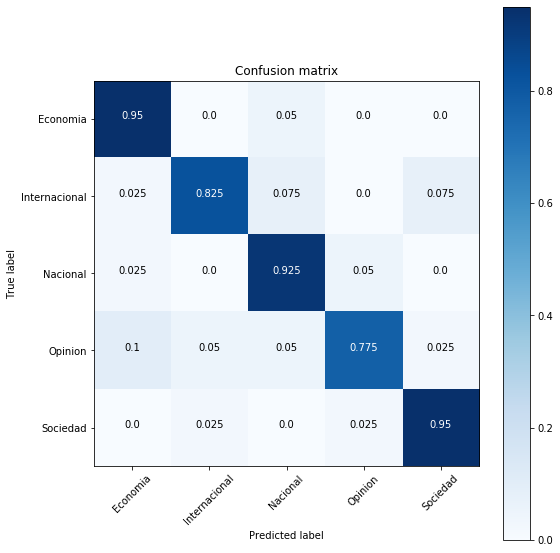

In [634]:
#test
y_predicted = tf_clf_nb.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)
class_report = classification_report(y_test, y_predicted) 
print(class_report)
f1 = f1_score(y_test, y_predicted, average='macro') 
print('f1-score', f1, '\n')
plot_confusion_matrix(cm, [*clf_nb.classes_], normalize=True) 

In [635]:
#Guardar vocabulario

pickle.dump(tf_clf_nb['vect'].vocabulary_, open("vocabulary.pkl","wb"))

#Cargar vocabulario
vocabulary = pickle.load(open("vocabulary.pkl", "rb"))

loaded_vec = CountVectorizer(analyzer='word', tokenizer=lambda text: tokenizer(text, **args),
                             decode_error="replace", vocabulary=vocabulary)
   
#Guardar clasificador
with open('nb_model.pkl', 'wb') as f:
    pickle.dump(tf_clf_nb['clf'], f)

#Cargar clasficador
with open('nb_model.pkl', 'rb') as f:
    clf_nb = pickle.load(f)

In [636]:
[df['title'][1], df['category'][1]]

['Alrededor de 40 mil hogares de Puente Alto, Pirque y San José de Maipo sufren corte de energía',
 'Nacional']

In [637]:
#Realizar una prediccioón
clf_nb.predict(loaded_vec.fit_transform(['Alrededor de 40 mil hogares de Puente Alto, Pirque y San José de Maipo sufren corte de energía']))

array(['Nacional'], dtype='<U13')

### 2.2 Regresión logística

In [638]:
#Creamos los objetos necesarios para el flujo de entrenamiento
lf_lg = LogisticRegression(multi_class='multinomial', solver='newton-cg') #objeto clasificador
tfidf_clf_lg = Pipeline([('vect', tfidf_vectorizer), ('clf', clf_lg)])

In [639]:
#entrenamiento
tfidf_clf_lg.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.8, max_features=None,
                                 min_df=5, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(...
                                 tokenizer=<function <lambda> at 0x000002061B6B01E0>,
                                 use_idf=True, vocabulary=None)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=Tr

               precision    recall  f1-score   support

     Economia       0.86      0.90      0.88        40
Internacional       0.94      0.80      0.86        40
     Nacional       0.82      0.90      0.86        40
      Opinion       0.89      0.78      0.83        40
     Sociedad       0.84      0.95      0.89        40

     accuracy                           0.86       200
    macro avg       0.87      0.86      0.86       200
 weighted avg       0.87      0.86      0.86       200

f1-score 0.8641681632442035 

Normalized confusion matrix


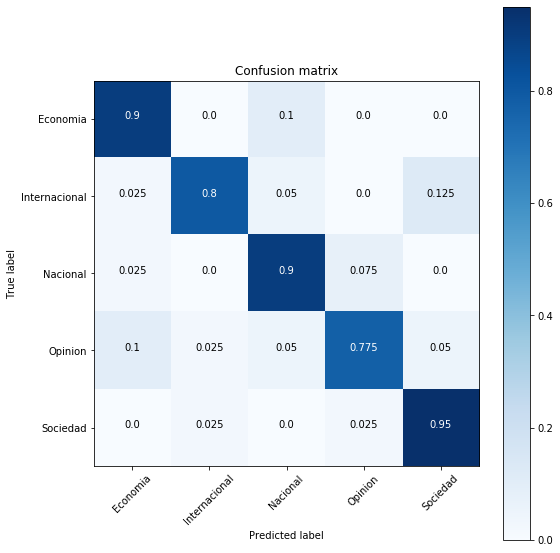

In [645]:
#test
y_predicted = tfidf_clf_lg.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)
class_report = classification_report(y_test, y_predicted) 
print(class_report)
f1 = f1_score(y_test, y_predicted, average='macro') 
print('f1-score', f1, '\n')
plot_confusion_matrix(cm, [*clf_lg.classes_], normalize=True) 

In [641]:
##Creamos los objetos necesarios para el flujo de entrenamiento

clf_svm = SVC() #objeto clasificador
parameters = {'C': range( 1, 10, 1 ), 'kernel': ['linear', 'poly', 'rbf']} #grilla de hiperparámetros

#A través de cross-validation determinar los mejores hiperparámetros escogidos al azar de la grilla
clf_svm_rcv = RandomizedSearchCV(estimator=clf_svm, param_distributions = parameters, n_iter=10, cv=5, 
                                scoring = 'accuracy', random_state=0, iid =False, n_jobs=-1)
tfidf_clf_svm = Pipeline([('vect', tfidf_vectorizer), ('clf', clf_svm_rcv)])

In [642]:
#entrenamiento
tfidf_clf_svm.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.8, max_features=None,
                                 min_df=5, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(...
                                                  degree=3,
                                                  gamma='auto_deprecated',
                                                  kernel='rbf', max_iter=-1,
                                                  probability=False,
                     

In [643]:
#los mejores hipeparámetros
tfidf_clf_svm['clf'].best_params_ 

{'kernel': 'linear', 'C': 9}

               precision    recall  f1-score   support

     Economia       0.86      0.88      0.87        41
Internacional       0.93      0.84      0.88        49
     Nacional       0.77      0.88      0.82        26
      Opinion       0.92      0.90      0.91        40
     Sociedad       0.84      0.86      0.85        44

     accuracy                           0.87       200
    macro avg       0.86      0.87      0.87       200
 weighted avg       0.87      0.87      0.87       200

f1-score 0.8671887740774249 

Normalized confusion matrix


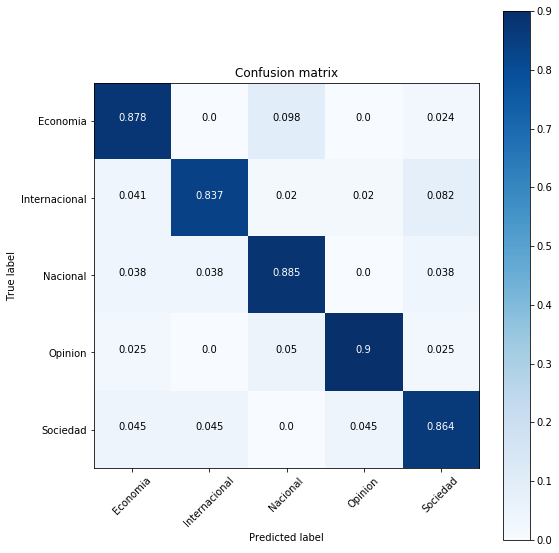

In [461]:
#test
y_predicted = tfidf_clf_svm.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)
class_report = classification_report(y_test, y_predicted) 
print(class_report)
f1 = f1_score(y_test, y_predicted, average='macro') 
print('f1-score', f1, '\n')
plot_confusion_matrix(cm, [*tfidf_clf_svm.classes_], normalize=True) 

# Information Retrieval

**Information Retrieval**: ciencia de búscar información en una colección de fuentes de información.

En este caso estamos interesados en búscar documentos similares dado un documento de búsqueda, para esto, primero necesitamos entender cómo podemos comparar de documentos.


## 1. Algunas medidas de distancia y similitud

1. Medidas de distanca como la norma $L_{1}$ (Manhattan) y $L_{2}$ (Euclidean):
    \begin{equation*}
    L_{1}(x,y)=\sum_{i=1}^{M}|x_{i}-y_{i}|, \; L_{2}(x,y)=\sqrt{\sum_{i=1}^{M}|x_{i}-y_{i}|^{2}}
    \end{equation*}

2. Generalización de las medidas anteriores es la Minkowski:
    \begin{equation*}
     L_{p}(x,y)=(\sum_{i=1}^{M}|x_{i}-y_{i}|^{p})^{\frac{1}{p}}
    \end{equation*}

3. Similitud coseno:

\begin{equation*}
cos(x,y) = \frac{x\cdot y}{\| x\|\| y\|}
\end{equation*}

4. Similitud euclideana:
\begin{equation*}
s_{L_{2}} = \frac{1}{1+L_{2}(x,y)}
\end{equation*}


En el caso de las medidas de distancia mientras mayor es la distancia entre dos vectores mayor es la disimilitud y en el caso de que la distancia es 0 se dice que los vectores son idénticos, por otro lado en las medidas de similitud como la coseno va entre [-1, 1], donde 1 significa que dos vectores son idénticos, -1 que son opuestos.

In [226]:
#similitud entre vectores
def l1_distance(x,y):
    return np.abs(x-y).sum()
                  
def l2_distance(x,y):
    return norm(x-y)

def cos(x,y):
    return np.dot(x,y)/(norm(x)*norm(y))

def l2_similarity(x,y):
    return 1/(1+l2_distance(x,y))


def l1_matrix(x):
    d = np.sum(np.abs(x[:, np.newaxis, :] - x[np.newaxis, :, :]), axis = -1)
    return d
                  
def l2_matrix(x):
    d = np.sqrt(np.sum((x[:, np.newaxis, :] - x[np.newaxis, :, :])**2, axis = -1))
    return d

def cos_matrix(x):
    num = np.sum(x[:, np.newaxis, :]*x[np.newaxis, :, :], axis=-1)
    den1 = np.linalg.norm(x, axis=1)
    den2 = np.linalg.norm(x, axis=1)
    den = den1[:, np.newaxis]*den2[np.newaxis, :]
    d = num/den
    return d

def l2_similarity_matrix(x):
    return 1/(1+l2_matrix(x))

## 2. Bag-of-words

Con el modelo bag-of-words obtenemos representaciones vectoriales de los documentos que podemos utilizar para calcular similitud (o disimilitud) entre documentos.

Desventajas:
1. Vectores sparse, dos vectores de documentos son casi ortogonales, por lo que la similitud puede ser baja.
2. No captura distancias entre palabras, palabras que son sinónimos ocupan un token diferente. Un ejemplo del caso anterior es cuando tenemos dos documentos que no tienen palabras en común, pero dicen lo mismo, solo que uno ocupa sinónimos de todas las palabras del otro, los vectores serían ortogonales y la similitud coseno es 0.


In [227]:
#Creamos los objetos que permiten llevar el corpus a un modelo bag-of-words
args = {"stopwords_remove": True, 'stemming':True}
tf_vectorizer = CountVectorizer(analyzer='word', tokenizer=lambda text: tokenizer(text, **args))
#Creamos la matriz tf sobre el corpus de los títulos de las noticias
tf_vectorizer.fit_transform(df.title)
print('Tamaño del vocabulario:', len(tf_vectorizer.vocabulary_))

#Creamos los objetos que permiten llevar el corpus a un modelo bag-of-words
args = {"stopwords_remove": True, 'stemming':True}
tfidf_vectorizer = TfidfVectorizer(analyzer='word', tokenizer=lambda text: tokenizer(text, **args))
#Creamos la matriz tf-idf sobre el corpus de los títulos de las noticias
tfidf_vectorizer.fit_transform(df.title)

Tamaño del vocabulario: 3623


<1000x3623 sparse matrix of type '<class 'numpy.float64'>'
	with 8146 stored elements in Compressed Sparse Row format>

In [231]:
#Documentos a estudiar

doc1 = df[df['category']=='Economia']['title'].iloc[1]
doc2 = df[df['category']=='Economia']['title'].iloc[2]
doc3 = df[df['category']=='Economia']['title'].iloc[20]
doc4 = df[df['category']=='Nacional']['title'].iloc[2]
doc5 = df[df['category']=='Sociedad']['title'].iloc[192]
doc6 = df[df['category']=='Opinion']['title'].iloc[4]
docs_list = [doc1, doc2, doc3, doc4, doc5, doc6]
print(doc1, '\n')
print(doc2, '\n')
print(doc3, '\n')
print(doc4, '\n')
print(doc5, '\n')
print(doc6, '\n')

Empresarios admiten que inmigración ha provocado impacto en los salarios y en cifras de desempleo 

Desocupación en el Bío Bío baja a 6,7%: administración pública y salud generaron nuevos empleos 

Desempleo se mantiene por sobre el 7% 

Habla director de Compin Bío Bío que se autoaprobó licencia: afirma que no se percató que era suya 

Hombre de 65 años inventó aviso de bomba en un avión por insólita razón: quería cita con una azafata 

Profesor desvinculado tras pedir leer a Lemebel será indemnizado: No puedo volver a Independencia 



In [235]:
#Obtener vector de los documentos
tf = tf_vectorizer.transform(docs_list)
tf.shape #6 documentos y 3623 columnas (tamaño del vocabulario)

(6, 3623)

In [236]:
#matriz de similitud coseno entre documentos
pd.DataFrame(cos_matrix(tf.toarray()))

,0,1,2,3,4,5
0,1.00,0.000000,0.25,0.000000,0.0,0.0
1,0.00,1.000000,0.00,0.365148,0.0,0.0
2,0.25,0.000000,1.00,0.000000,0.0,0.0
3,0.00,0.365148,0.00,1.000000,0.0,0.0
4,0.00,0.000000,0.00,0.000000,1.0,0.0
5,0.00,0.000000,0.00,0.000000,0.0,1.0


In [237]:
#matriz de similitud euclideana entre documentos
pd.DataFrame(l2_similarity_matrix(tf.toarray()))

,0,1,2,3,4,5
0,1.000000,0.182744,0.261204,0.190744,0.186605,0.200000
1,0.182744,1.000000,0.210897,0.210897,0.172538,0.182744
2,0.261204,0.210897,1.000000,0.224009,0.217129,0.240253
3,0.190744,0.210897,0.224009,1.000000,0.179129,0.190744
4,0.186605,0.172538,0.217129,0.179129,1.000000,0.186605
5,0.200000,0.182744,0.240253,0.190744,0.186605,1.000000


Se observa que una gran cantidad de vectores ortogonales bajo similitud coseno.
Bajo similitud euclideana casi todos los documentos son casi igual de similares.

 - Notar que el documento 2 y 4 tienen una alta similitud, esto se debe a la coincidencia de una palabra (Bío) a pesar de que hablan de temas completamente distintos.

- En documentos más largos como el contenido de la noticia es más fácil que los vectores no sean ortogonales ya que la probabilidad de encontrar palabras que se repiten en ambos documentos es mayor.

In [238]:
#Obtener vector de los documentos
tfidf = tfidf_vectorizer.transform(docs_list)
tfidf.shape #4 documentos y 3623 columnas (tamaño del vocabulario)

(6, 3623)

In [239]:
#matriz de similitud coseno entre documentos
pd.DataFrame(cos_matrix(tfidf.toarray()))

,0,1,2,3,4,5
0,1.000000,0.000000,0.254179,0.000000,0.0,0.0
1,0.000000,1.000000,0.000000,0.293212,0.0,0.0
2,0.254179,0.000000,1.000000,0.000000,0.0,0.0
3,0.000000,0.293212,0.000000,1.000000,0.0,0.0
4,0.000000,0.000000,0.000000,0.000000,1.0,0.0
5,0.000000,0.000000,0.000000,0.000000,0.0,1.0


In [240]:
#matriz de similitud euclideana entre documentos
pd.DataFrame(l2_similarity_matrix(tfidf.toarray()))

,0,1,2,3,4,5
0,1.000000,0.414214,0.450181,0.414214,0.414214,0.414214
1,0.414214,1.000000,0.414214,0.456842,0.414214,0.414214
2,0.450181,0.414214,1.000000,0.414214,0.414214,0.414214
3,0.414214,0.456842,0.414214,1.000000,0.414214,0.414214
4,0.414214,0.414214,0.414214,0.414214,1.000000,0.414214
5,0.414214,0.414214,0.414214,0.414214,0.414214,1.000000


Se observa que una gran cantidad de vectores ortogonales bajo similitud coseno.
Bajo similitud euclideana casi todos los documentos son casi igual de similares.

## 3. Word Embeddings

Los \textit{Words Embedding} basados en predicción son principalmente arquitecturas de redes neuronales que $"$aprenden$"$ la representación subyacente de las palabra, capturan la $"$semántica$"$ de las palabras en una representación vectorial densa de baja dimensión y a partir de estos vectores se puede construir representaciones vectoriales de un texto (conjunto de palabras). 

- Para esta implementación se utilizarón los embedding obtenidos utilizando el algoritmo FasText sobre el corpus Spanish Billion Word Corpus.

- Los emebeddings utilizados codifican la semántica de las palabras en un vector denso de dimensión 300.

Link de descarga:
https://github.com/dccuchile/spanish-word-embeddings


- Existen dos formas de cargar los vectores, primero es cargar todos los vectores desde el archivo binario (.bin) en su formato nativo de FastText. Esta opción es más demandante en recursos (tiempo y memoria), pero es mucho más versatil por ejemplo para obtener vectores para palabras que no se ecuentran en el vocabulario.


In [7]:
wordvectors_file = 'fasttext-sbwc.bin'
model = FastText.load_fasttext_format(wordvectors_file)
wordvectors = model.wv

- La segunda forma, mucho más rápida, es cargar sólo una parte de los vectores. Para esto usamos el formato nativo de word2vec y cargamos una cantidad fija de vectores (se pueden cargar vectores generados por diversos métodos como FastText).

In [612]:
# #Cargar vectores
# wordvectors_file_vec = 'fasttext-sbwc.3.6.e20.vec'
# cantidad = 100000 #cantidad de vectores a cargar
# wordvectors = KeyedVectors.load_word2vec_format(wordvectors_file_vec, limit=cantidad)

### 3.1 Similitud entre palabras

Los word embeddings entregan representaciones vectoriales de las palabras, permitiendonos tener nociones de distancia entre estas, así podemos utilizar distancias tales como l1, l2 o la similitud coseno.

In [244]:
reina = wordvectors['reina']
reina

array([-2.57698685e-01, -3.05227446e-03, -4.21362191e-01, -1.02369852e-01,
       -3.46166380e-02, -2.10825473e-01, -3.21935192e-02,  2.97198325e-01,
       -2.24466085e-01, -7.13609084e-02, -5.35109222e-01, -2.18910053e-01,
        6.13557883e-02, -7.37681240e-02,  1.66193143e-01,  5.66283846e-03,
        2.42169306e-01, -2.58466631e-01,  1.29880279e-01,  4.64084484e-02,
       -1.74548998e-01,  1.19527444e-01, -4.90019657e-02, -3.98389623e-02,
       -1.80941708e-02, -3.97182196e-01,  2.72530526e-01, -4.55783486e-01,
       -2.92190552e-01, -1.25448585e-01,  2.52285451e-01,  2.43016239e-02,
       -2.83539504e-01,  2.52966404e-01, -6.71533525e-01, -8.53631459e-03,
       -1.80770695e-01, -2.17426032e-01,  4.13519889e-01,  1.93564758e-01,
       -4.64920029e-02, -7.48625547e-02, -1.04175456e-01,  1.51321843e-01,
       -1.63956642e-01,  3.44364345e-01,  2.10140347e-02,  3.74083638e-01,
        1.77878901e-01, -1.13907032e-01,  2.15061188e-01,  2.48354688e-01,
       -2.50446528e-01,  

In [245]:
#similitud entre vectores
cos(wordvectors['reina'], wordvectors['rey'])

0.6821936

In [246]:
cos(wordvectors['mujer'], wordvectors['hombre'])

0.5953886

In [247]:
cos(wordvectors['perro'], wordvectors['gato'])

0.7273405

In [257]:
cos(wordvectors['jugar'], wordvectors['jugaría'])

0.7661157

In [260]:
cos(wordvectors['cantar'], wordvectors['cantaría'])

0.7047347

In [261]:
cos(wordvectors['cantar'], wordvectors['jugar'])

0.4480109

#### Búsqueda por analogías

3CosMul: Medida de similitud utilizada para responder preguntas de analogías

En analogías se tiene un conjunto $b^{*}$, $b$ (ej:reina, rey) y $a^{*}$, $a$ (ej:mujer, hombre), la intuición es que 
$b^{*}-b$ es similar a $a^{*}-a$ y que la operación $b-a+a^{*}$ debe dar un vector similar a $b^{*}$, entonces, el objetivo en busqueda de analogías es encontrar la palabra $b^{*}$ que máximiza una medida de similitud. La médida de similitud con más exito en esta tarea es 3Cosmul:

\begin{equation*}
\underset{b^{*}\in V}{\text{arg max}}\frac{cos(b^{*}, b)cos(b^{*}, a^{*})}{cos(b^{*}, a)+\epsilon)} 
\end{equation*}

donde $\epsilon$=0.0001 y es usado para prevenir división la división por cero. 3CosMul requiere que todas las similitudes sean no negativas, para lo cual transforma la similitud coseno a rango [0, 1], usando $\overline{cos(x,y)} = \frac{cos(x,y)+1}{2}$.

<img src='img/w2vec_analogy.png' width=500 heigth=500>


In [19]:
def norm_cos(x,y):
    return (cos(x,y)+1)/2

def cos_mul(b, a_, a, topn):
    """ 
    3CosMul: Medida de similitud utilizada para responder preguntas de analogías
    
    En analogías se tiene un conjunto b_, b (ej:reina, rey) y a_, a (ej:mujer, hombre), la intuición es que 
    b_-b es similar a a_-a y que la operación b-a+a_ debe dar un vector similar a b_, en busqueda de analogías 
    se busca la palabra b_ que máximiza 3CosMul.
    
    Entrega los n_tops resultados más similares como una lista de tuplas:
    
    Ejemplo::
    
    >>> cos_mul('rey', 'mujer', 'hombre', 5)

        [('reina', 0.9140047562223514),
         ('rey', 0.9061936251090417),
         ('infanta', 0.8581019619488603),
         ('berenguela', 0.8469323337883055),
         ('princesa', 0.8443721928290459)]

    """
   
    #Conjunto de palabras donde se realizará la query
    words_list = set(wordvectors.index2word)
    words_list = words_list.difference({b, a_, a}) #eliminar palabras usadas en la query de la búsqueda
    
    
    #vectores de las palabras de la query
    b = wordvectors[b]
    a_ = wordvectors[a_]
    a = wordvectors[a]
    
    epsilon  = 0.0001 #para evitar divisiones por cero
    
    similarities_dict = {}
    for word in words_list:
        b_ = wordvectors[word] #vector de la palabra
        #guardar similitud
        similarities_dict[word] = norm_cos(b_, b)*norm_cos(b_, a_)/(norm_cos(b_, a)+epsilon)
    #ordenar diccionario por similitud y entregar los n resultados más similares
    tops = sorted(similarities_dict.items(), key=operator.itemgetter(1), reverse = True)[:topn]   
    return tops

In [262]:
b = 'rey'
a_ ='mujer'
a = 'hombre'
cos_mul(b, a_, a, 5)

[('reina', 0.9140044452635799),
 ('infanta', 0.8581010861951421),
 ('berenguela', 0.8469311264119546),
 ('princesa', 0.84437190578192),
 ('consorte', 0.8354707016195237)]

In [24]:
#implementación de gensim
wordvectors.most_similar_cosmul(positive=['rey','mujer'],negative=['hombre'])

[('reina', 0.914152979850769),
 ('infanta', 0.8582400679588318),
 ('berenguela', 0.8470717668533325),
 ('princesa', 0.8445038199424744),
 ('consorte', 0.8355995416641235),
 ('ranavalona', 0.8260708451271057),
 ('emperatriz', 0.8247671723365784),
 ('regente', 0.8239890336990356),
 ('infantas', 0.810472846031189),
 ('adelgunda', 0.8082677721977234)]

In [22]:
wordvectors.most_similar_cosmul(positive=['actor','mujer'],negative=['hombre'])

[('actriz', 0.9687132835388184),
 ('compositora', 0.8557142019271851),
 ('actríz', 0.8530595302581787),
 ('cantante', 0.848200261592865),
 ('actrices', 0.8459416627883911),
 ('exactriz', 0.8435853123664856),
 ('dramaturga', 0.8354865908622742),
 ('presentadora', 0.8346391320228577),
 ('bailarina', 0.8301040530204773),
 ('coprotagonista', 0.8284390568733215)]

In [23]:
wordvectors.most_similar_cosmul(positive=['jugar','canta'],negative=['cantar'])

[('juega', 0.9270391464233398),
 ('jugaré', 0.8999035954475403),
 ('juegue', 0.8958004117012024),
 ('jugando', 0.883209228515625),
 ('jugará', 0.8695147037506104),
 ('juegan', 0.8680771589279175),
 ('jugarás', 0.8679772615432739),
 ('jugaría', 0.8661564588546753),
 ('jugado', 0.8658621311187744),
 ('jugaria', 0.8629751205444336)]

In [25]:
wordvectors.most_similar_cosmul(positive=['santiago','venezuela'],negative=['chile'])

[('caracas', 0.9048649072647095),
 ('barinas', 0.8718462586402893),
 ('cojedes', 0.85147625207901),
 ('guanare', 0.8507247567176819),
 ('barquisimeto', 0.8451411724090576),
 ('caraballeda', 0.8443132638931274),
 ('aragua', 0.8427073955535889),
 ('maracaibo', 0.8378208875656128),
 ('miranda', 0.8358795046806335),
 ('zulia', 0.8357462286949158)]

#### Visualización de Words Embedding usando PCA

In [58]:
X = model[model.wv.vocab]
print(X.shape)
pca = PCA(n_components=2)
pca.fit(X)

C:\Users\diego\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

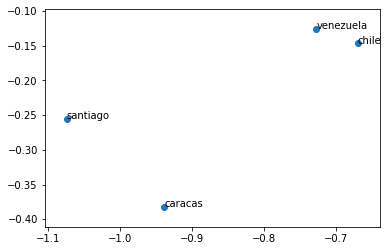

In [63]:
words = ['santiago', 'caracas', 'venezuela', 'chile']
words_to_transform = np.array([wordvectors[word] for word in words])
words_transformed = pca.transform(words_to_transform)


plt.scatter(words_transformed[:, 0], words_transformed[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy = (words_transformed[i, 0], words_transformed[i, 1]))
plt.show()

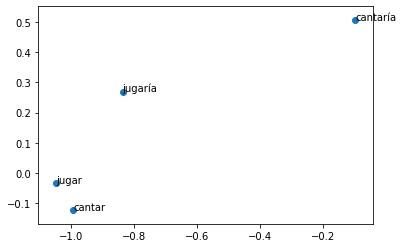

In [64]:
words = ['jugar', 'cantar', 'jugaría', 'cantaría']
words_to_transform = np.array([wordvectors[word] for word in words])
words_transformed = pca.transform(words_to_transform)


plt.scatter(words_transformed[:, 0], words_transformed[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy = (words_transformed[i, 0], words_transformed[i, 1]))
plt.show()

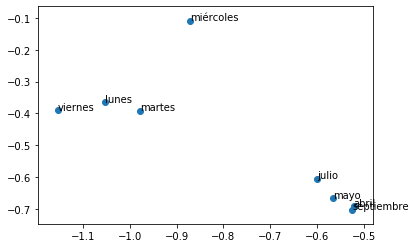

In [264]:
words = ['abril', 'mayo', 'septiembre', 'julio', 'lunes', 'miércoles', 'viernes', 'martes']
words_to_transform = np.array([wordvectors[word] for word in words])
words_transformed = pca.transform(words_to_transform)


plt.scatter(words_transformed[:, 0], words_transformed[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy = (words_transformed[i, 0], words_transformed[i, 1]))
plt.show()

#### Búsqueda de términos excluidos

Busca la palabra que está más lejos al resto de las palabras, para esto calcula la similitud coseno promedio de cada palabra versus el resto, la palabra con menor similitud promedio es el output.

In [14]:
wordvectors.doesnt_match(['blanco','azul','rojo','chile'])

C:\Users\diego\Anaconda3\lib\site-packages\gensim\models\keyedvectors.py:730: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'chile'

In [15]:
wordvectors.doesnt_match(['abril', 'mayo', 'septiembre', 'martes', 'julio'])

'martes'

In [16]:
wordvectors.doesnt_match(['santiago', 'paris', 'talca', 'concepcion'])

'paris'

### 3.2 Similitud entre textos

La similitud entre textos es una tarea más complicada que la similitud entre palabras, si bien se han entrenado redes neuronales con el objetivo de aprender directamente el vectore de una frase (phrase embedding), este no funciona muy bien, solo funciona en corpus grandes de frases cortas, además que son poco generalizables a diferencia de los word embedding.

#### Agregación

Una forma sencilla de obtener una representación vectorial de un documento a partir de los vectores de las palabras que lo conforman es agregarlos, por ejemplo, a partir del promedio. 


\begin{equation*}
V_{d}= \sum_{i=1}^{n}v_{i}
\end{equation*}

donde $v_{i}$ el vector de la palabra $i$ del documento $d$ y $V_{d}$ es el vector del documento (phrase vector).


El problema de esto es que la agregación tienede a suavizar los vectores y la semántica se empieza a perder sobre todo en documentos con un gran número de palabras.

In [571]:
def vector_agregation(doc, vocabulary=None):
    """
    Input: str, documento.
    Output: np.array, Vector promedio de los vectores de palabras.
    
    """
    #tokenizar el documento
    bog =  tokenizer(doc, stopwords_remove=True, vocabulary=vocabulary)
    #matriz con los vectores, solo se obtienen vectores de palabras que están en el vocabulario
    words_vectors = np.array([wordvectors[word] for word in bog ])
    return words_vectors.mean(axis=0)

def corpus_matrix(corpus, vocabulary=None):
    matrix = np.array([vector_agregation(doc, vocabulary) for doc in corpus])
    return matrix

In [560]:
docs_list

['Empresarios admiten que inmigración ha provocado impacto en los salarios y en cifras de desempleo',
 'Desocupación en el Bío Bío baja a 6,7%: administración pública y salud generaron nuevos empleos',
 'Desempleo se mantiene por sobre el 7%',
 'Habla director de Compin Bío Bío que se autoaprobó licencia: afirma que no se percató que era suya',
 'Hombre de 65 años inventó aviso de bomba en un avión por insólita razón: quería cita con una azafata',
 'Profesor desvinculado tras pedir leer a Lemebel será indemnizado: No puedo volver a Independencia']

In [561]:
pd.DataFrame(cos_matrix(corpus_matrix(docs_list)))

,0,1,2,3,4,5
0,1.000000,0.676903,0.738754,0.444896,0.485055,0.484614
1,0.676903,1.000000,0.611990,0.558161,0.389183,0.431275
2,0.738754,0.611990,1.000000,0.344407,0.329750,0.374123
3,0.444896,0.558161,0.344407,1.000000,0.498772,0.614822
4,0.485055,0.389183,0.329750,0.498772,1.000000,0.650855
5,0.484614,0.431275,0.374123,0.614822,0.650855,1.000000


In [562]:
pd.DataFrame(l2_similarity_matrix(corpus_matrix(docs_list)))

,0,1,2,3,4,5
0,1.000000,0.361452,0.327760,0.303738,0.317443,0.300799
1,0.361452,1.000000,0.293338,0.347691,0.320648,0.305161
2,0.327760,0.293338,1.000000,0.249655,0.250963,0.248093
3,0.303738,0.347691,0.249655,1.000000,0.343468,0.347995
4,0.317443,0.320648,0.250963,0.343468,1.000000,0.364465
5,0.300799,0.305161,0.248093,0.347995,0.364465,1.000000


asdlasdsad
as
das
d
sad
sad
sad


#### Word Mover's Distance

La representación vectorial de documentos no es una tarea resulta a diferencia de las palabras, soluciones como agregación no funciona tan bien debido a que se pierde semántica y no es robusta a la cantidad de palabras, la solución a esto es utilizar medidas de distancias o similitud más elaboradas

Word Mover's Distance (WMD) permite medir similitud (o disimilitud) entre documentos, utiliza dos ideas, la representación bag-of-words de un documento y word embedding.

WMD busca minimizar el costo de transformar un documento a otro, para esto modelo el problema como un problema de flujo a costo mínimo (MCF).

\begin{equation*}
\begin{array}
& & \underset{T}{\text{minimize}}
& & \sum_{i=1}^{m}\sum_{j=1}^{n} c_{ij}T_{ij} \\
& \text{subject to}
& & \sum_{j=1}^{m}T_{ij}= d_{i} \; i=1, \ldots, m\\
& & &\sum_{i=1}^{n}T_{ij}= d_{j}^{´} \; j=1, \ldots, n\\
& & & T_{ij} \geq 0,\; i = 1, \ldots, m, \; j=1, \ldots n.\\
\end{array}
\end{equation*}

Donde $T_{ij}$ es el flujo que va de la palabra $i$ del documento $d$ a la palabra $j$ del documento $d^{´}$, $d_{i}$ es el peso que tiene la palabra $i$ en la representación bag-of-words del documento $d$ (frecuencia normalizada por el número de palabras), $c_{ij}$ es el costo de mover una unidad de flujo por el arco $(i,j)$, el costo entre palabras se mide como la distancia 'l1' o 'l2' entre los embedding de dichas palabras. La primera restricción indica que el flujo que se mueve de una palabra $i$ del documento $d$ a todas las palabras del documento $d^{´}$ debe sumar su peso, la segunda restricción significa que el flujo que se mueve de una palabra $j$ del documento $d^{'}$ a todas las palabras del documento $d$ debe sumar su peso.



<img src='img/wmd-obama.png' width=500, heigth=500>

In [294]:
def wmd_matrix(docs_list):
    wmd_matrix = np.zeros((len(docs_list), len(docs_list))) #matriz que guardará las distancias
    bow = [tokenizer(doc, stopwords_remove=True) for doc in docs_list]   #lista con la representación bag-of-words de los docs
    for i in range(len(docs_list)):
        for j in range(len(docs_list)):
            wmd_matrix[i,j] = wordvectors.wmdistance(bow[i], bow[j])
    return wmd_matrix

def wmd_sim_matrix(docs_list):
    return 1/(1+ wmd_matrix(docs_list))

In [454]:
docs_list

['Empresarios admiten que inmigración ha provocado impacto en los salarios y en cifras de desempleo',
 'Desocupación en el Bío Bío baja a 6,7%: administración pública y salud generaron nuevos empleos',
 'Desempleo se mantiene por sobre el 7%',
 'Habla director de Compin Bío Bío que se autoaprobó licencia: afirma que no se percató que era suya',
 'Hombre de 65 años inventó aviso de bomba en un avión por insólita razón: quería cita con una azafata',
 'Profesor desvinculado tras pedir leer a Lemebel será indemnizado: No puedo volver a Independencia']

In [298]:
pd.DataFrame(wmd_matrix(docs_list))

,0,1,2,3,4,5
0,0.000000,4.830216,3.841213,5.674107,4.923857,4.887952
1,4.830216,0.000000,4.938733,4.059509,5.381330,5.334730
2,3.841213,4.938733,0.000000,5.686099,5.033984,4.971366
3,5.674107,4.059509,5.686099,0.000000,5.441930,5.375846
4,4.923857,5.381330,5.033984,5.441930,0.000000,4.585185
5,4.887952,5.334730,4.971366,5.375846,4.585185,0.000000


In [299]:
pd.DataFrame(wmd_sim_matrix(docs_list))

,0,1,2,3,4,5
0,1.000000,0.171520,0.206560,0.149833,0.168809,0.169838
1,0.171520,1.000000,0.168386,0.197648,0.156707,0.157860
2,0.206560,0.168386,1.000000,0.149564,0.165728,0.167466
3,0.149833,0.197648,0.149564,1.000000,0.155233,0.156842
4,0.168809,0.156707,0.165728,0.155233,1.000000,0.179045
5,0.169838,0.157860,0.167466,0.156842,0.179045,1.000000


## 4. K-Nearest Neighbors

Para evaluar la calidad de una técnica de recuperación de información se suele recurrir a aprendizaje supervisado y la tarea escogida es clasificación. En este caso contamos con noticias etiquetadas, entonces, un buen método de recuperación de información dada una noticia como query debiese retornar dentro de las $k$ noticias más similares noticias de la misma categoría.

K-Nearest Neighbors es un modelo de clasificación el cual etiqueta una observación utilizando como input la etiqueta de las $k$ observaciones más cercanas que pertenecen al conjunto de entrenamiento, por ejemplo, si tomamos una noticia del conjunto de test y el número de vecinos a buscar es $k=10$ y el resultado de la búsqueda dió 8 noticias de la categoría Economía y 2 noticias de la categoría Nacional, entonces, la etiqueta para esta noticia es Economía.

Cada método de recuperación de información se diferencia en el cálculo de una medida de similitud (o disimilitud) entre observaciones, por tanto, un mejor método de recuperación de información debiese tener un KNN con mejores métricas de desempeño.

<img src='img/knn_example.png'>

### 4.1 KNN - TFIDF

In [647]:
#Creamos los objetos necesarios para el flujo de entrenamiento
clf_knn = KNeighborsClassifier(n_neighbors=20, metric='minkowski', p=2) #objeto clasificador
tfidf_clf_knn = Pipeline([('vect', tfidf_vectorizer), ('clf', clf_knn)])#objeto pipeline

In [648]:
#entrenamiento
tfidf_clf_knn.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.8, max_features=None,
                                 min_df=5, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function <lambda> at 0x000002061B6B01E0>,
                                 use_idf=True, vocabulary=None)),
                ('clf',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      met

               precision    recall  f1-score   support

     Economia       0.80      0.90      0.85        40
Internacional       0.84      0.80      0.82        40
     Nacional       0.79      0.75      0.77        40
      Opinion       0.78      0.70      0.74        40
     Sociedad       0.84      0.90      0.87        40

     accuracy                           0.81       200
    macro avg       0.81      0.81      0.81       200
 weighted avg       0.81      0.81      0.81       200

f1-score 0.8082228796108464 

Normalized confusion matrix


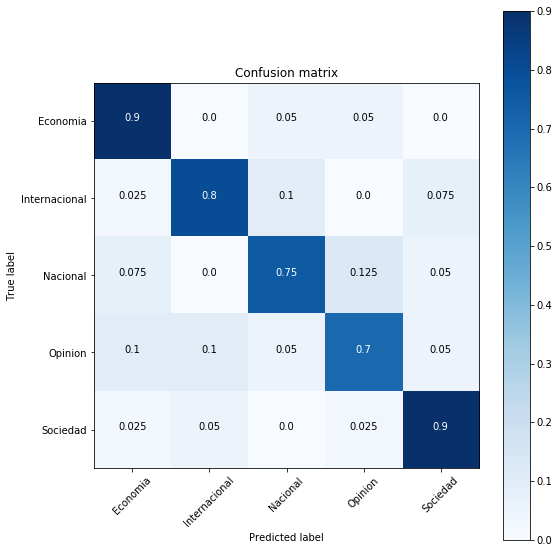

In [649]:
#test
y_predicted = tfidf_clf_knn.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)
class_report = classification_report(y_test, y_predicted) 
print(class_report)
f1 = f1_score(y_test, y_predicted, average='macro') 
print('f1-score', f1, '\n')
plot_confusion_matrix(cm, [*tfidf_clf_knn.classes_], normalize=True) 

KNN con TF funciona pésimo y es debido a que las variables no estan normalizadas (solo frecuencia) y la distancia euclideana es bastante sensible a ese fenómeno, por tanto, es recomendable usar TF-IDF.

### 4.2 KNN-Words Embedding-Vectors Agregation

In [650]:
args = {"stopwords_remove": True}
tf_vectorizer = CountVectorizer(analyzer='word', tokenizer=lambda text: tokenizer(text, **args),
                               max_df = 0.8, min_df = 5)
tf_vectorizer.fit(X_train, X_test)
vocabulary = [*tf_vectorizer.vocabulary_.keys()]

In [651]:
V_train  = corpus_matrix([*X_train])
V_test = corpus_matrix([*X_test])
va_clf_knn = KNeighborsClassifier(n_neighbors=10, metric='minkowski', p=2)
#entrenamiento
va_clf_knn.fit(V_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

               precision    recall  f1-score   support

     Economia       0.85      0.85      0.85        40
Internacional       0.94      0.85      0.89        40
     Nacional       0.82      0.70      0.76        40
      Opinion       0.67      0.78      0.72        40
     Sociedad       0.84      0.93      0.88        40

     accuracy                           0.82       200
    macro avg       0.83      0.82      0.82       200
 weighted avg       0.83      0.82      0.82       200

f1-score 0.820675242474508 

Normalized confusion matrix


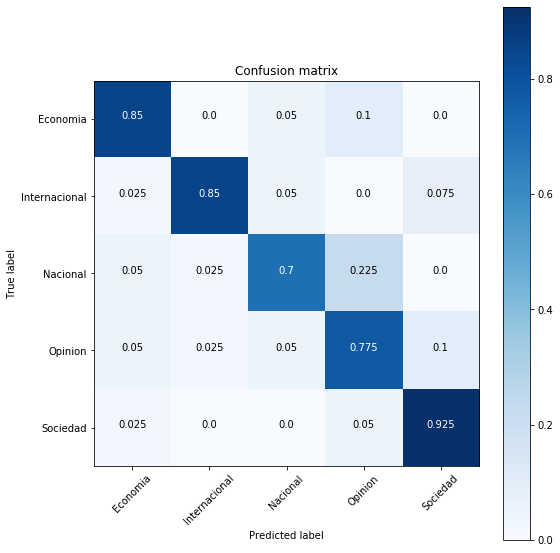

In [652]:
#test
y_predicted = va_clf_knn.predict(V_test)
cm = confusion_matrix(y_test, y_predicted)
class_report = classification_report(y_test, y_predicted) 
print(class_report)
f1 = f1_score(y_test, y_predicted, average='macro') 
print('f1-score', f1, '\n')
plot_confusion_matrix(cm, [*va_clf_knn.classes_], normalize=True) 

### 4.3 KNN-Word Move's Distance

In [686]:
class KNN_WMD_Classifer():
    def __init__(self, n_neighbors=5, vocabulary=None):
        self.n_neighbors = n_neighbors
        self.vocabulary = vocabulary
    #Guardar datos de entrenamientos
    def fit(self, X_train, y_train):
        #corpus de train tokenizado
        self.X_train = [tokenizer(doc, stopwords_remove=True, vocabulary=self.vocabulary) for doc in X_train] 
        self.y_train = [*y_train]

    def predict(self, X_test):
        #corpus de test tokenizado
        self.X_test = [tokenizer(doc, stopwords_remove=True, vocabulary=self.vocabulary) for doc in X_test] 
       
        y_predict = []
        for i in range(len(self.X_test)):
            #Inicialización
            distance_vector = np.zeros(len(self.X_train))
            #Calcular las distancias de cada documento de test con todos los documentos de train
            for j in range(len(self.X_train)):
                distance = wordvectors.wmdistance(self.X_test[i], self.X_train[j])
                distance_vector[j] = distance
            #Cálcular los k-vecinos
            knn_argvector = distance_vector.argsort()[:self.n_neighbors]
            knn_classes = [self.y_train[i] for i in knn_argvector]
            #Cálcular la etiqueta y guardar
            count_dict = count_unique_element_in_list(knn_classes)
            majority_class = sorted(count_dict.items(), key=operator.itemgetter(1), reverse = True)[0][0]
            y_predict.append(majority_class)
        return y_predict
    

    
def count_unique_element_in_list(list_to_count):
    count_dict = {}
    for elem in list_to_count:
        if elem in count_dict.keys():
            count_dict[elem]+=1
        else:
            count_dict[elem]=1
    return count_dict      

https://vene.ro/blog/word-movers-distance-in-python.html

In [ ]:
ti = time()
#Objeto clasificador
wmd_clf_knn = KNN_WMD_Classifer(n_neighbors=10, vocabulary=vocabulary)
#Entrenamiento
wmd_clf_knn.fit(X_train,y_train)
#Predicción
y_predicted = wmd_clf_knn.predict(X_test)
tf=time()
print(tf-ti)

In [ ]:
#Evaluación
cm = confusion_matrix(y_test, y_predicted)
class_report = classification_report(y_test, y_predicted) 
print(class_report)
f1 = f1_score(y_test, y_predicted, average='macro') 
print('f1-score', f1, '\n')
plot_confusion_matrix(cm, [*tfidf_clf_knn.classes_], normalize=True) 

In [693]:
(84*200/3600)

4.666666666666667

# Topic Modeling

El modelamiento de tópicos, es una herramienta estadística que busca encontrar los temas presentes en un conjunto de documentos (corpus), permitiendo organizar, buscar, indexar, explorar y comprender grandes colecciones de documentos.\\


En este sentido, los temas se pueden definir como ``un patrón repetitivo de términos co-currentes en un corpus''. Por ejemplo, se tiene el siguiente tópico, representado por sus cuatro palabras más probables, ``salud'', ``médico'', ``paciente'', ``hospital'', estas palabras sugieren el siguiente nombre para el tema: ``Atención médica‘’.En los modelos convencionales de tópicos:
1. Las palabras dentro de un documento y los documentos son tratados como intercambiables.
2. La mayoría de estos fijan el número de tópicos y lo  mantienen así a lo largo del corpus completo.


## 1. Latent Dirichlet Allocation
 
Sean  *K* tópicos, $\beta_{1:K}$ son distribuciones de probabilidad sobre un vocabulario fijo, dibujadas por una $Dirichlet(\eta)$. Para cada documento $d$ del corpus $D$ se asume que es dibujado por el siguiente proceso generativo:


1. Escoger la mezcla de tópicos $\theta_{d}$ de una distribución sobre un $(K− 1)-simplex$, tal como una $Dirichlet(\alpha)$.
2. Para cada palabra:
    - Escoger la asignación del tópico $z\sim Mult(\theta_{d})$
    - Escoger una palabra $w \sim Mult(\beta_{z})$


<img src='img/lda_graphical_model.png'>

 
### Ejemplo de output
### Revisar Murphy Mixture Models
### K-means
 
Blei, D. M., Ng, A. Y., and Jordan, M. I. (2003). Latent dirichlet allocation. Journal of machine Learning research, 3(Jan):993–1022.

In [ ]:
#Creamos el diccionario a partir de los textos procesados en el formato que necesita LDA en gensim
dictionary = Dictionary(newcorpus)

#Creamos el corpus para darle al modelo (segun el formato de esta libreria)
#El corpus contiene una representacion numerica de los textos, un texto es representada por una lista de tuplas
#donde el primer elemento de la tupla es la id de la palabra y el segundo es su frecuencia de aparición en el texto.


corpus = [dictionary.doc2bow(text) for text in newcorpus]

#guardamos el diccionario y el corpus
dictionary.save('dictionary.dict')
MmCorpus.serialize('corpus.mm', corpus)

In [ ]:
print('Primer elemento del diccionario o bolsa de palabras:', dictionary[0])
print('Representación del corpus en el formato que requiere la librería: \n', corpus[0:2] )

In [ ]:
Lda_k_5=LdaModel(corpus=corpus, id2word=dictionary, num_topics=5) 
Lda_k_5.save('Lda_k_5.model') # guardamos el modelo

## Visualización LDA

Las visualizaciones en modelamiento de tópicos nos ayudan a responder tres preguntas:

1. **¿Cuál es el significado de cada tópico?**
2. **¿Cuán predominante es cada tópico?**
3. **¿Cómo se relacionan los tópicos entre sí?**



Sievert, C., & Shirley, K. (2014), desarrollaron una herramienta de visualización para responder estas preguntas. La herramienta a través de una visualización espacial responde la pregunta 2 y 3.  

Además para responder la pregunta 1 incorporan un gráfico de barras a la derecha del gráfico espacial que muestra las palabras más relevantes del tópico seleccionado dado un parámetro $\lambda$ entre 0 y 1,  entonces, la relevancia de la palabra w en el tópico $k$ dado $\lambda$ esta dada a  través de la siguiente formula:
\begin{equation*}
r(w,k|\lambda) = \lambda log(\phi_{k,w})+(1-\lambda)log(\frac{\phi_{k,w}}{p_{w}}), \lambda \in [0,1]$$
\end{equation*}
Donde $\phi_{k,w}$ es la probabilidad de que el término $w$ sea generado por el tópico $k$, $p_{w}$ es la probabilidad de el término $w$ en el corpus.\\  


\footnote{Sievert, C., & Shirley, K. (2014). LDAvis: A method for visualizing and interpreting topics. In Proceedings of the workshop on interactive language learning, visualization, and interfaces (pp. 63-70).} 

\href{http://nbviewer.jupyter.org/github/bmabey/hacker_news_topic_modelling/blob/master/HN\%20Topic\%20Model\%20Talk.ipynb#topic=3&lambda=0.46&term=}{ \texttt{Click aquí: LDAvis example}}
  

In [ ]:
#Preparar los datos para generarar la visualización de LDA
lda_display = pyLDAvis.gensim.prepare(Lda_k_5, corpus, dictionary, sort_topics=True, R=30)